<h1 style="font-size:3em;color:#2467C0"align="center">Artificial Intelligence System Design</h1>

## Import the Libraries

In [1]:
import sqlite3
import pandas as pd 
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt

In [2]:
df = pd.read_csv('letter_recognition_data.csv', header=None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


The data does not contain any columns, hence let's add the columns names

In [4]:
df.columns = ["letter", "x-box", "y-box", "width","high",
              "onpix","x-bar","y-bar","x2bar","y2bar","xybar",
              "x2ybr","xy2br","x-ege","xegvy","y-ege","yegvx"]

### column details
1.  letter - English alphabets in uppercase
2.  x-box  - Horizontal position of box
3.  y-box  - Vertical position of box
4.  width  - Width of box 
5.  high   - Height of box 
6.  onpix  - Total # on pixels
7.  x-bar  - Mean x of on pixels in box 
8.  y-bar  - Mean y of on pixels in box
9.  x2bar  - Mean x variance
10. y2bar  - Mean y variance 
11. xybar  - Mean x y correlation 
12. x2ybr  - Mean of x * x * y 
13. xy2br  - Mean of x * y * y 
14. x-ege  - Mean edge count left to right 
15. xegvy  - Correlation of x-ege with y 
16. y-ege  - Mean edge count bottom to top
17. yegvx  - Correlation of y-ege with x 

In [5]:
df.head()

,letter,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


The columns are successfully added to the dataframs

Make another dataset which can be converted into numerical values later on and can be used for correlation

In [6]:
df1 = df.copy()

In [7]:
df.shape

(20000, 17)

The dataset contains 17 columns where one column contains letters and 16 columns contains features. There are 20,000 rows containing information about letters in different fonts. 

Let's check if there are any missing values in the dataset. 

In [8]:
df.isnull().sum()

letter    0
x-box     0
y-box     0
width     0
high      0
onpix     0
x-bar     0
y-bar     0
x2bar     0
y2bar     0
xybar     0
x2ybr     0
xy2br     0
x-ege     0
xegvy     0
y-ege     0
yegvx     0
dtype: int64

The dataset is clean containing no missing values

Let's check the overview of dataset

In [9]:
df.describe()

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


Let's view the mean values of each attribute for each letter

In [10]:
letter_means = df.groupby('letter').mean()
letter_means

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
letter,,,,,,,,,,,,,,,,
A,3.337136,6.975919,5.128010,5.178707,2.991128,8.851711,3.631179,2.755387,2.043093,7.802281,2.338403,8.465146,2.771863,6.321926,2.875792,7.468948
B,3.985640,6.962141,5.088773,5.169713,4.596606,7.671018,7.062663,5.366841,5.571802,7.954308,5.506527,6.652742,3.117493,7.919060,6.612272,9.100522
C,4.031250,7.063859,4.701087,5.296196,2.775815,5.437500,7.627717,5.927989,7.177989,8.773098,7.494565,11.947011,1.991848,8.876359,4.080163,8.555707
D,4.023602,7.244720,5.170186,5.288199,4.026087,7.539130,6.806211,5.921739,6.508075,8.166460,5.111801,5.750311,3.365217,7.813665,3.971429,7.628571
E,3.727865,6.944010,4.756510,5.201823,3.679688,5.966146,7.352865,4.223958,7.585938,8.507812,6.242188,10.341146,2.127604,8.298177,6.022135,8.506510
F,3.832258,7.009032,4.898065,5.209032,3.178065,4.913548,10.454194,3.476129,4.886452,11.242581,7.830968,5.723871,1.736774,9.117419,3.321290,6.712258
G,4.086675,6.988357,4.988357,5.282018,3.566624,6.866753,6.586028,5.966365,5.337646,7.429495,6.157827,9.586028,2.833118,8.369987,5.146184,9.216041
H,4.331063,6.844687,5.784741,5.193460,4.253406,7.344687,7.320163,6.702997,4.280654,8.044959,5.899183,7.801090,3.862398,8.047684,3.095368,7.858311
I,2.270199,6.980132,2.631788,5.209272,1.825166,7.458278,7.035762,1.940397,5.973510,9.476821,5.797351,7.649007,0.537748,8.066225,2.141722,7.931126


### Convert categorical values into numerical
In order to analyse the correlation of categorical variables, we need to convert them in to numeriacal values.
Let's use label encoder to convert letters into numerical values.

In [11]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder() 
df1['letter']= label_encoder.fit_transform(df1['letter']) 
df1['letter'].unique()

array([19,  8,  3, 13,  6, 18,  1,  0,  9, 12, 23, 14, 17,  5,  2,  7, 22,
       11, 15,  4, 21, 24, 16, 20, 10, 25])

### Outliers Detection
Now we detect the outliers 

Text(0.5, 1.0, 'letter vs xegvy')

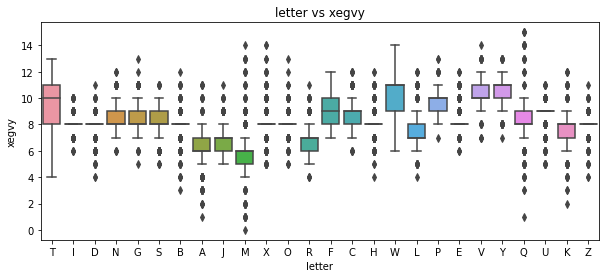

In [12]:
plt.figure(figsize=(10,4))
sns.boxplot(x='letter',y='xegvy',data=df)
plt.title('letter vs xegvy')

Text(0.5, 1.0, 'letter vs x2ybr')

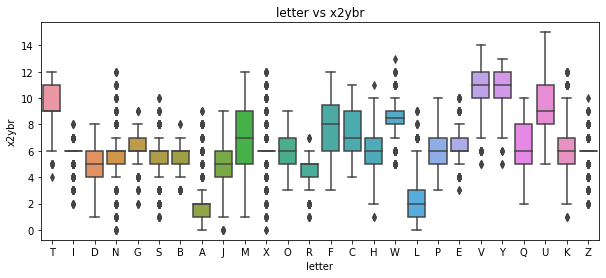

In [13]:
plt.figure(figsize=(10,4))
sns.boxplot(x='letter',y='x2ybr',data=df)
plt.title('letter vs x2ybr')

Text(0.5, 1.0, 'letter vs X-box')

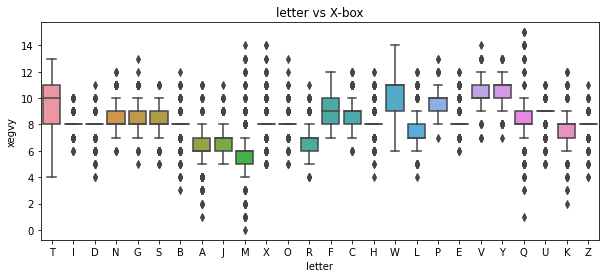

In [14]:
plt.figure(figsize=(10,4))
sns.boxplot(x='letter',y='xegvy',data=df)
plt.title('letter vs X-box')

Although there are some values that deviate from the mean values however, these values do not affect the model in case of Random forest algorithm.

### Analyse the correlation of variables

Let's view the coorrelation of letter variables with each attribute. 

Text(0.5, 1.0, 'Correlation of different attributes')

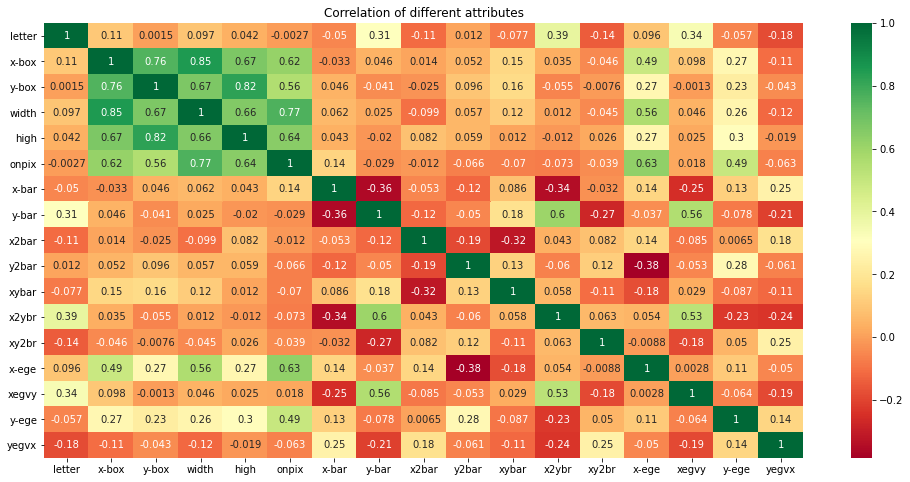

In [15]:
plt.figure(figsize=(17,8))
p=sns.heatmap(df1.corr(), annot=True,cmap='RdYlGn')
plt.title('Correlation of different attributes')

The above table shows that x2ybr, y-bar, and xegvy have the most positibe correlation with letter whereas yegvx has high negative correlation with the letters. 
There are some attributes which have negligible correlation with the letters, hence they can be ignored while building the model.
It can also be seen that x-box, y-box, width, high, onpix have high correlation with each other showing that they give the same information, hence some of them can be ignored while building the model. 

### Select the 10 best features
Now let's use univariate features selection to select the features to build the model. 
We will use SelectKBest class to select the 10 best featurs which are highly correlated with the letters

In [16]:
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

arr = df.values
X = arr[:,1:18]
Y = arr[:,0]

# Extract features
test = SelectKBest(score_func=f_classif, k=10)
fit = test.fit(X, Y)

### Print scores and selected features

In [17]:
# Display the scores
set_printoptions(precision=2)
print(fit.scores_)
feat = fit.transform(X)

# Display selected features
print(feat[0:5,:])

[  76.02    3.34  129.61   10.34  110.86  349.09 1172.18  407.21  752.44
  349.48 1241.35  915.65 1080.24  917.06  640.67  283.46]
[[8 13 0 6 6 10 8 0 8 0]
 [10 5 5 4 13 3 9 2 8 4]
 [10 6 2 6 10 3 7 3 7 3]
 [5 9 4 6 4 4 10 6 10 2]
 [8 6 6 6 6 5 9 1 7 5]]


### Extract Features and Target ('letter') Values into Separate Dataframes
No we will extract the features and target into a separate dataframes in order to create a model

In [18]:
X = feat
y = df.iloc[:, 0]

### Split the Dataset into Training and Test Datasets
Now we will split our dataset into training and test dataset. Since more training data results in better solution, we will keep training size of 70% and test size of 30%. Since we have a huge dataset, it a little change in training and test dataset will not greatly affect the model results. We will keep random size of zero so that it gives the same output no matter how many times the model is run. 

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) 

print('There are {} samples in the training set and {} samples in the test set'.format(X_train.shape[0], X_test.shape[0]))

There are 14000 samples in the training set and 6000 samples in the test set


## Random Forest Classifier
### Make Classifier Model
Now we will make a Random Forest regressor model. Initially we will fit our model to the training set

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import balanced_accuracy_score


#Create Random Forest object
random_forest = RandomForestClassifier()
import time
#Train model
start_time = time.time()
random_forest.fit(X_train, y_train)
print("The model took %s seconds to train" % (time.time() - start_time))

The model took 2.7646076679229736 seconds to train


### Find out the accuracy of model
Now we will calculate the accuracy by which our model is created.

In [27]:
print('The score of the Model on training data: {:.2f}'.format(random_forest.score(X_train, y_train)))
print('The score of the Model on test data    : {:.2f}'.format(random_forest.score(X_test, y_test)))

The score of the Model on training data: 1.00
The score of the Model on test data    : 0.96


### Find Confusion Matrix
Now we will find the confusion matrix

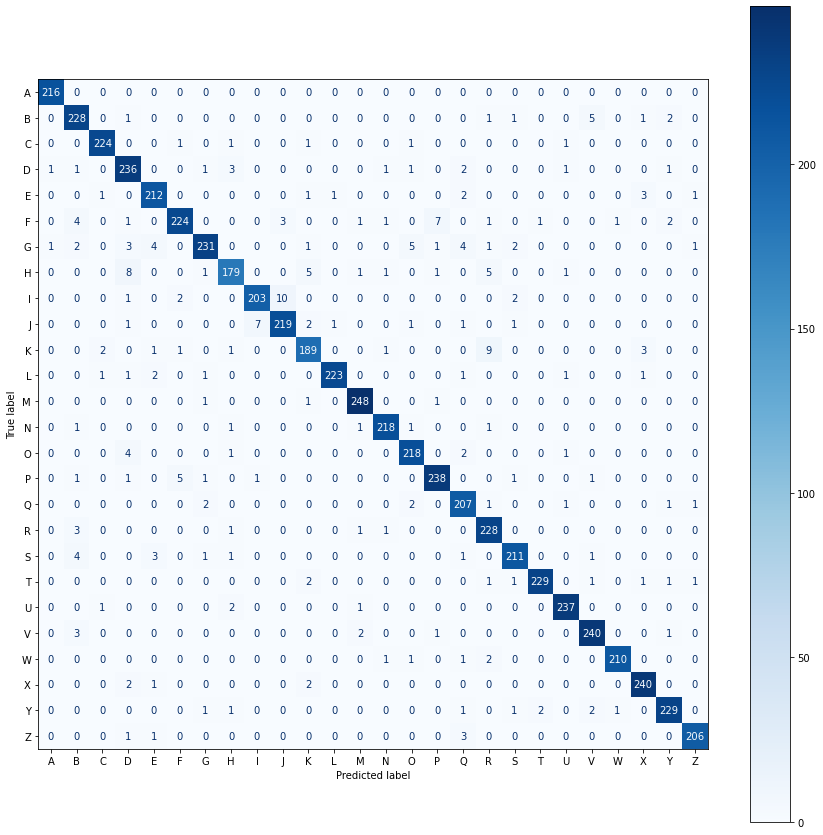

In [22]:
from sklearn.metrics import plot_confusion_matrix
fig, ax = plt.subplots(figsize=(15, 15))
plot_confusion_matrix(random_forest, X_test, y_test, normalize=None, cmap=plt.cm.Blues, ax=ax)
plt.show()

Confusion Matrix in normalised form

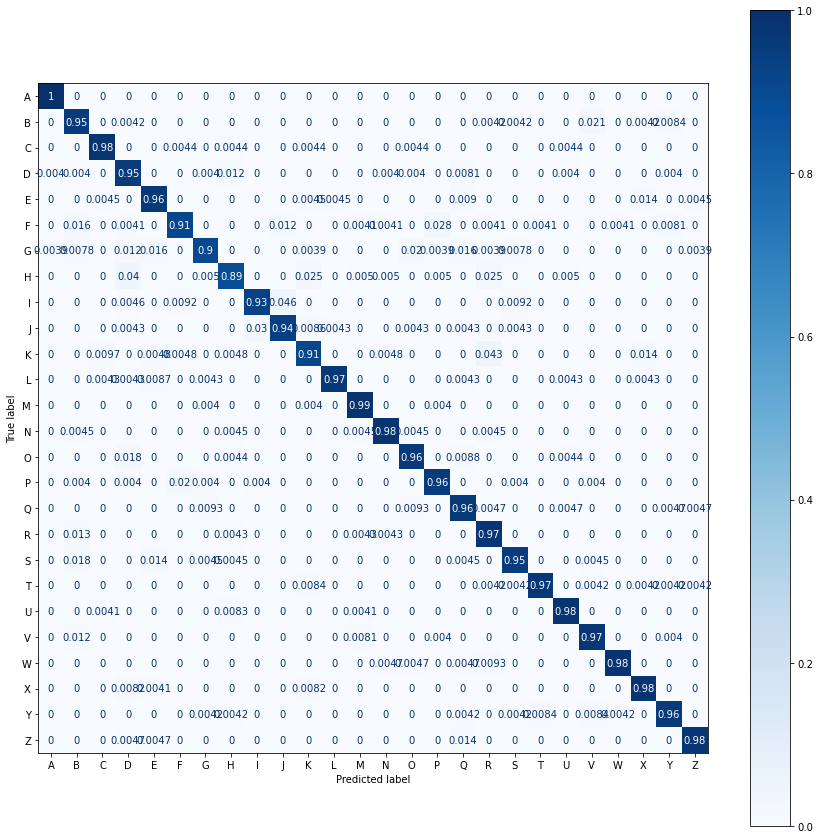

In [23]:
from sklearn.metrics import plot_confusion_matrix
fig, ax = plt.subplots(figsize=(15, 15))
plot_confusion_matrix(random_forest, X_test, y_test, normalize='true', cmap=plt.cm.Blues, ax=ax)
plt.show()

### Find the performance matrices
Now we will find out the values of performance parameters

In [24]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
y_pred = random_forest.predict(X_test)

acc = accuracy_score(y_test, y_pred)
ba_acc = balanced_accuracy_score(y_test, y_pred)
pre = precision_score(y_test, y_pred,average='weighted')
rec = recall_score(y_test, y_pred,average='weighted')
F1 = 2 * (pre * rec) / (pre + rec)

print('The Accuracy of model          : ', acc )
print('The Balanced Accuracy of model : ', ba_acc )
print('The Weighted Precision of model: ', pre )
print('The Weighted Recall of model   : ', rec )
print("The F1 score of model          : " , F1)

The Accuracy of model          :  0.9571666666666667
The Balanced Accuracy of model :  0.9569762427207025
The Weighted Precision of model:  0.9575255339535779
The Weighted Recall of model   :  0.9571666666666667
The F1 score of model          :  0.9573460666792
